## CSE 6367 Programming Assignment 4 (P4)
## Fall 2023
## Panorama

## Dataset

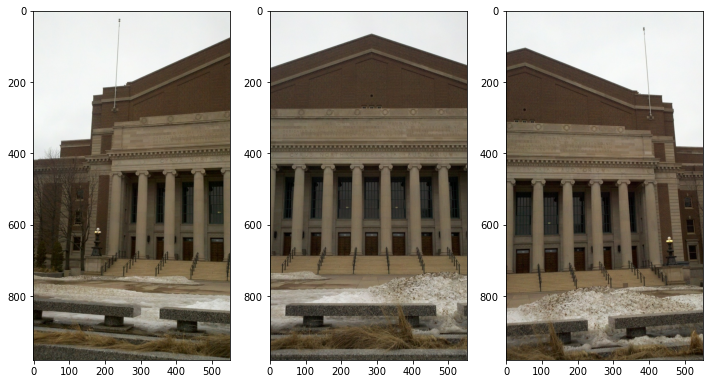

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# read images
img1 = cv2.imread("Images/mall1.jpg")
img2 = cv2.imread("Images/mall2.jpg")
img3 = cv2.imread("Images/mall3.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

## Assignment Instructions:

In this assignment, you will perform image stitching and create a panorama of stitched images. Here are some basic steps you need to perform for image stiching:

    1. Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images
    2. Matching the descriptors between the images
    3. Estimate a homography matrix using our matched feature vectors
    4. Applying a warping transformation using the homography matrix obtained from Step #3
    
<b> You may use opencv or other libraries for doing different tasks of this programming assignment.<\b>

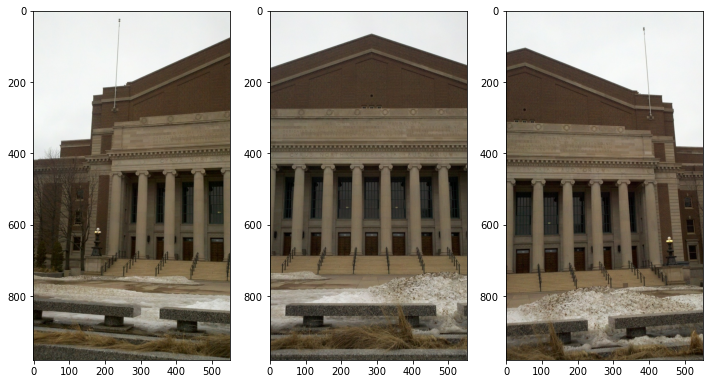

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

#  figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# load the images from Iamges directory
img1 = cv2.imread("Images/mall1.jpg")
img2 = cv2.imread("Images/mall2.jpg")
img3 = cv2.imread("Images/mall3.jpg")

# Convert the images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

In [3]:
#user define panaroma_image function
def panaroma_image(img1,img2):
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    
# Step-1:Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images
    
    #using SIFT algorithm for keypoint detection and extracting features
    sift=cv2.SIFT_create()
    keypoints_img1,descriptors_1=sift.detectAndCompute(gray_img1,None)
    keypoints_img2,descriptors_2=sift.detectAndCompute(gray_img2,None)
    
    #convert keypoints to arrays using numpy
    keypoints1 = np.float32([keypoint.pt for keypoint in keypoints_img1])
    keypoints2 = np.float32([keypoint.pt for keypoint in keypoints_img2])

#Step-2:Matching the descriptors between the images
    #descriptor matching equation using BFMatcher fucntion
    matching=cv2.BFMatcher(cv2.NORM_L2,crossCheck=False)
    best_matches=matching.match(descriptors_1,descriptors_2)
    sorted_matching_points=sorted(best_matches, key= lambda x: x.distance)
    
#step-3: Estimate a homography matrix using our matched feature vectors

    #homography matrix calculation for first two images 
    projection_threshold=3
    homography_matrix=[]
    if len(sorted_matching_points) > 4:
        points_img1 = np.float32([keypoints1[m.queryIdx] for m in sorted_matching_points])
        points_img2 = np.float32([keypoints2[m.trainIdx] for m in sorted_matching_points])
        # Calculate the homography matrix between the sets of points
        homography_matrix, status = cv2.findHomography(points_img2, points_img1, cv2.RANSAC,projection_threshold)
        
    #width of final image is sum of the width of two images
    width = img1.shape[1] + img2.shape[1]
    height = max(img1.shape[0], img2.shape[0])  #maximum height as the height of resulting image
    
#step-4: Applying a warping transformation using the homography matrix obtained from Step #3
    #warp img1 into img2
    result = cv2.warpPerspective(img2, homography_matrix,  (width, height))
    #stich two images together
    result[0:img1.shape[0], 0:img1.shape[1]] = img1
    
    return result

In [4]:
def trim_image(image):
    
    #check if top row of pixels is black and recursively remove if true
    if not np.sum(image[0]):
        return trim_image(image[1:])
    #check if bottom row of pixels is black and recursively remove if true
    if not np.sum(image[-1]):
        return trim_image(image[:-2])
    #check if leftmost column of pixels is black and recursively remove if true
    if not np.sum(image[:,0]):
        return trim_image(image[:,1:])
    #check if rightmost column of pixels is black and recursively remove if true
    if not np.sum(image[:,-1]):
        return trim_image(image[:,:-2])
    return image

#### Plotting the result

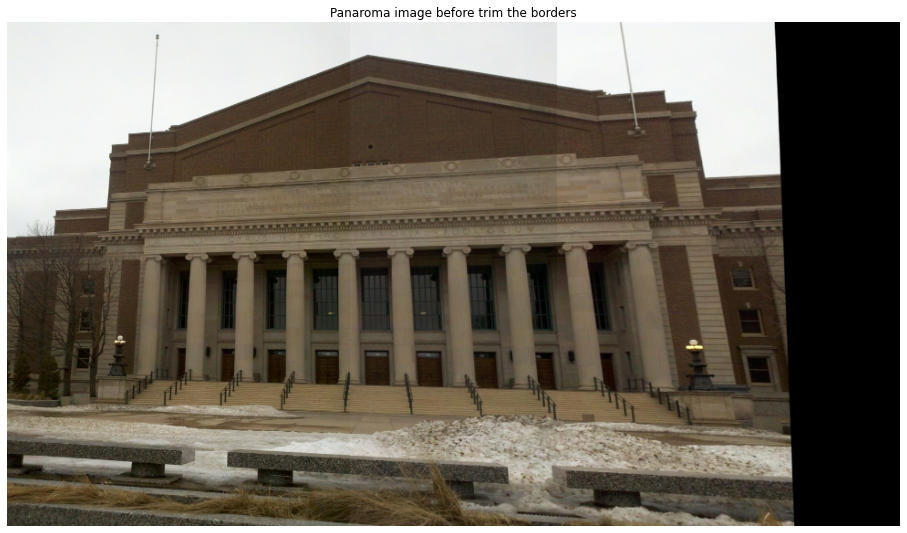

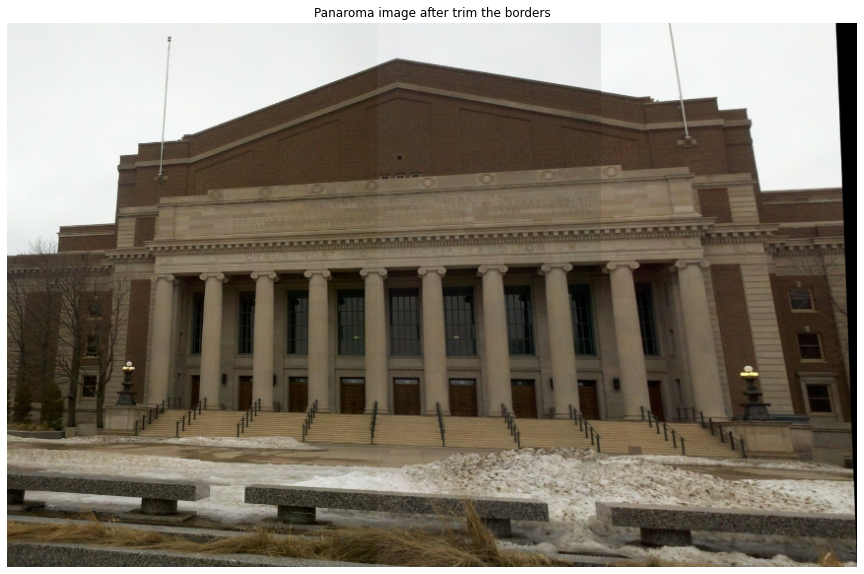

In [5]:
#stiching the first two images by calling panaroma_image function
result1=panaroma_image(img1,img2)

#remove black border by calling trim image function
result1=trim_image(result1) 
w= result1.shape[1]
h=result1.shape[0]
a=0
b=0
result1 = result1[b:b+h, a:a+w-30]

#stiching 3rd image with the first result
result2=panaroma_image(result1,img3)   
result2 = cv2.resize(result2, (img3.shape[0],img3.shape[1]), interpolation= cv2.INTER_LINEAR)
#triming the border of result2
Final_image=trim_image(result2)
plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(result2)
plt.title("Panaroma image before trim the borders")
plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(Final_image)
plt.title("Panaroma image after trim the borders")
plt.show()

### Submission Guidelines:
        
        Submit through Canvas your source code in a single .ipynb file. 
        The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
        The images are available in the ./Images directory. Your TA will use the same directory name to grade your submission.
        You don't need to attach the images folder with your submission.